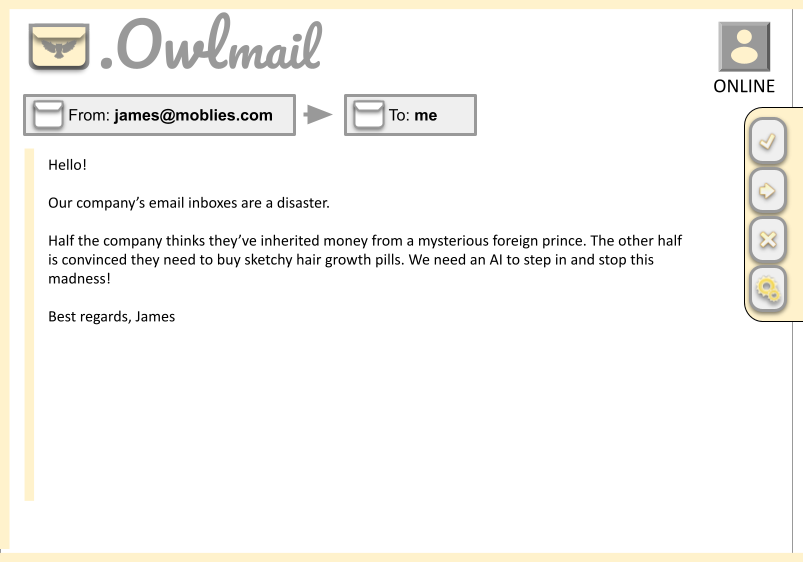


----
"Hello!

Our company's email inboxes are a disaster.

Half the company thinks they’ve inherited money from a mysterious foreign prince. The other half is convinced they need to buy sketchy hair growth pills. We need an AI to step in and stop this madness!"

---

Sounds like James and co. are in a real pickle. Let's walk through this first customer order together step-by-step.

#Step 1: Understanding the problem

The customer wants an AI-based spam filter that will help them sort real emails from spam.

📌 **Here's what we will do:**
1. Train an **AI model** using past email data.

2. Convert emails into a **numerical format** so a machine learning model can understand them.

3. Evaluate how well our model filters spam.

4. Test the AI by coming up with **new email examples**

We will be working with **machine learning, text processing, and data handling**. If this sounds difficult, don't sweat it!

It's true that these tasks are complicated, but Python provides **ready-made tools** that do the heavy lifting for us.


# Step 2: Importing dependencies
Before we start working on the code itself, we need to import **dependencies.** Dependencies are pre-written code libraries that help us perform complex tasks easily.

Below is a list of the **libraries we will import** and what they do. Don't worry about memorizing any of this - like in all coding, you can simply look the syntax up again when you need it.

Let's import them now by clicking the Play-button to the left of the code!

### Important: Make sure you run the code of each section at least once before moving on to the next part!

In [ ]:
# Importing necessary Python libraries

import numpy as np  # Helps with working with numbers and large amounts of data.
import pandas as pd  # Helps organize data into tables (DataFrames)
import matplotlib.pyplot as plt  # Lets us create charts and graphs to understand data better through visualization.

# Importing tools from scikit-learn (sklearn) for machine learning
from sklearn.feature_extraction.text import CountVectorizer  # Converts text into numbers
from sklearn.naive_bayes import MultinomialNB  # A simple machine learning model for text classification
from sklearn.model_selection import train_test_split  # Splits data into training and test sets
from sklearn.metrics import accuracy_score, classification_report  # Measures model performance

#Step 3: Working with data
After importing dependencies, we will need some email data.

A **dataset** is a collection of information that we use to **train** our AI.
For our spam filter, we need a dataset containing **examples of emails**, labeled as either **spam (1)** or **not spam (0)**.

Previously in *Solutions & Syntax*, you were introduced to **Python lists**.

📌 We will use a **list of lists**, where:  

- Each **email** is stored as text inside a list.  

- Each **email** is paired with a **label**:  

  - `1 = Spam` (unwanted/junk email)  
  - `0 = Not Spam` (normal email)  

  
This format ensures that every email is paired with its classification, making it possible for our AI to learn from examples.

 📝 **Task 1:**
  The customer has provided us some more emails to use as **training data**.

  1. *Jolly good work negotiating that new contract, Pete. Let's discuss your promotion on Wednesday.*
  2. *Urgent message from the Prince of Luxembourg! You have inherited a big sum of money!*
  3. *Dealing with hair loss? Try our new pill and grow a full head of hair in just 7 days!*
  4. *Note - the weekly meeting has been postponed to 10:30 AM*
  5. *Your electricity bill is overdue. Pay now to avoid extra fees.*
  6. *Hey Susie, can you give me a ride to the airport this evening?*

  
**Discuss with your group** and decide which of these emails are likely to be spam and which are likely to be legitimate. Insert them to the list of lists in the **code below**, labeling spam emails with 1 and legitimate with 0.

▶ the email itself is a **string**

▶ the label is an **integer**

▶ In a single list, every item **except the last one** is followed by a **comma ,**

In [ ]:
emails = [
    ["Congratulations! You are our 1,000,000th visitor! Click here to claim your yacht!", 1],
    ["Reminder: Team meeting at 10 AM tomorrow", 0],
    ["Lunch plans? Let’s meet at noon.", 0],
    ["URGENT: Your PayPal account has been compromised. Send us your password in an email now!", 1],
    ["Don't forget: Project deadline is this Friday", 0],
    ["Free Fortnite lootboxes! Just give us your credit card number, three digits on the back and the expiration month and year.", 1],
     # Add customer emails 1-6 below
    ["student input here", 0],
    ["student input here", 1]
]

You can see what the data looks like right now by printing it using a **for** loop:

In [ ]:
#print dataset preview
for row in emails:
    print(row)

['Congratulations! You are our 1,000,000th visitor! Click here to claim your yacht!', 1]
['Reminder: Team meeting at 10 AM tomorrow', 0]
['Lunch plans? Let’s meet at noon.', 0]
['URGENT: Your PayPal account has been compromised. Send us your password in an email now!', 1]
["Don't forget: Project deadline is this Friday", 0]
['Free Fortnite lootboxes! Just give us your credit card number, three digits on the back and the expiration month and year.', 1]
['student input here', 0]
['student input here', 1]


# Step 4: Converting Text into Numbers</h4>

Computers and AI **don’t understand words** the way humans do.  

Instead, they work with **numbers**.  

Before we train our AI, we need to **convert** our email text into a format it can process.

📌 For this, we will use **CountVectorizer**, a tool that:

1. **Finds all unique words** in the dataset.

2. **Counts how many times each word appears in an email**.

3. **Creates a table** where each row represents an email and each column represents a word.

This method is known as **"word count vectorization"** because it simply **counts** the number of times specific words appear in a dataset.

---

Let's apply this method to our dataset and see how our email text gets converted into numerical data.


In [ ]:
# Convert text to numbers using CountVectorizer
vectorizer = CountVectorizer()
email_texts = [email[0] for email in emails]
transformed_emails = vectorizer.fit_transform(email_texts)

# Example transformation preview
feature_names = vectorizer.get_feature_names_out()
sample_email_index = 0

print("📩 Original Email:")
print(email_texts[sample_email_index])

print("\n🔢 Transformed Representation (Word Counts):")
word_counts = dict(zip(feature_names, transformed_emails.toarray()[sample_email_index]))
print(word_counts)

📩 Original Email:
Congratulations! You are our 1,000,000th visitor! Click here to claim your yacht!

🔢 Transformed Representation (Word Counts):
{'000': 1, '000th': 1, '10': 0, 'account': 0, 'am': 0, 'an': 0, 'and': 0, 'are': 1, 'at': 0, 'back': 0, 'been': 0, 'card': 0, 'claim': 1, 'click': 1, 'compromised': 0, 'congratulations': 1, 'credit': 0, 'deadline': 0, 'digits': 0, 'don': 0, 'email': 0, 'expiration': 0, 'forget': 0, 'fortnite': 0, 'free': 0, 'friday': 0, 'give': 0, 'has': 0, 'here': 1, 'in': 0, 'input': 0, 'is': 0, 'just': 0, 'let': 0, 'lootboxes': 0, 'lunch': 0, 'meet': 0, 'meeting': 0, 'month': 0, 'noon': 0, 'now': 0, 'number': 0, 'on': 0, 'our': 1, 'password': 0, 'paypal': 0, 'plans': 0, 'project': 0, 'reminder': 0, 'send': 0, 'student': 0, 'team': 0, 'the': 0, 'this': 0, 'three': 0, 'to': 1, 'tomorrow': 0, 'urgent': 0, 'us': 0, 'visitor': 1, 'yacht': 1, 'year': 0, 'you': 1, 'your': 1}


While the transformed email data above may look confusing to you, it is a lot easier for the computer to understand!

# Step 5: Training the Spam Detection Model

Now that we have transformed our email text into numbers, we are ready to **train our AI model**.  

- Training an AI model means allowing it to **find patterns** in the data.

- The model will analyze which words are common in **spam vs. non-spam emails**.

- Once trained, the AI will be able to predict whether **new emails** are spam or not.

---

We will use a **Naïve Bayes classifier**, a common machine learning model for **text classification** .  


Now, let’s train the model using the dataset **emails**.

- It will analyze the words in spam vs. non-spam emails.

- It will learn which words are commonly found in spam messages.

- After training, it should be able to predict whether a new email is spam or not.



In [ ]:
# Rename variables for clarity
spam_labels = [email[1] for email in emails]  # Labels indicating spam (1) or not spam (0)

# Create a Naïve Bayes model
model = MultinomialNB()

# Train the model using the entire dataset. This is where the "magic" happens!
model.fit(transformed_emails, spam_labels)

print("✅ Model training complete! The AI is now ready to classify emails.")

✅ Model training complete! The AI is now ready to classify emails.


#Step 6: Testing the Spam Filter

We have trained our model to work as an email spam filter. That's great, but we have no idea yet if it works or not. We need some **test data**!

 📝 **Task 2:**
Try coming up with your own test data!

- Think about common spam phrases or scams (e.g., "Win a free vacation!").

- Try legitimate emails (e.g., "Hey, are you free for lunch?").

- If you are having trouble, you can look up ideas on the internet. For example, https://caniphish.com/phishing-email-examples has some examples.




In [ ]:
# 📩 Testing the AI with New Emails

# Sample test emails – modify these or add your own examples
test_emails = [
    "Win big now! Click here to claim your cash prize!",  # Likely spam
    "Can you send me the report before noon?",  # Likely not spam
    "Dear Mr. Smith: President of USA would like to gift you a million dollars ",  # Likely spam
    "Hey, want to grab coffee later?",  # Likely not spam
]

# Transform the test emails into numerical format
test_features = vectorizer.transform(test_emails)

# Use the model to predict whether the emails are spam or not
predictions = model.predict(test_features)

# Display results
print("📊 AI Predictions:")
for email, prediction in zip(test_emails, predictions):
    print(f"Email: \"{email}\" → {'Spam' if prediction == 1 else 'Not Spam'}")

📊 AI Predictions:
Email: "Win big now! Click here to claim your cash prize!" → Spam
Email: "Can you send me the report before noon?" → Spam
Email: "Dear Mr. Smith: President of USA would like to gift you a million dollars " → Spam
Email: "Hey, want to grab coffee later?" → Spam


#Step 7: Understanding the AI's performance

Now that we have tested the AI with new emails, let’s evaluate how well it works.


📌 **Why is the model making mistakes?**
- The AI **only knows what it has been trained on**.

- Because ** our data set is small **, it may believe some unrelated common words mean the message is spam, (e.g. "you", "for" etc.)  

- If it encounters an **email style it has never seen before**, it may misclassify it.

- If a spam message  **looks similar to a real email**, it is harder to detect.



📌 **Types of Mistakes:**
- **False Positives:** A legitimate email is mistakenly marked as spam.

- **False Negatives:** A spam email is mistakenly marked as legitimate.



📝 **Task 3:**

- Can you find an example of a spam message that our AI **fails to detect**?

```
# This is formatted as code
```



- Can you create a real email that the AI incorrectly marks as spam?

- What words seem to make an email "spammy" according to our AI?


#Step 8: Re-training the model

Our spam filter is working, but it's not perfect. Some emails might still be misclassified.

Task 4:
In this task, your goal is to improve the accuracy of the model by:

- Adding more training data (both spam and non-spam emails).
- Creating new test emails to check if the model improves.
- Re-training the model using the same method as before. Iteration is the key!

📌 Think about different types of spam and real emails.

Can you add phishing scams or fake job offers?
What about non-spam emails like business updates or personal messages?

You can search online for examples too!

💡 Modify the dataset below by adding as many new spam and non-spam emails as you can think of.


 We will extend the old list of list **emails** by using the **extend()**  combineit with the variable for the new list of emails.


In [ ]:
# Add more emails to improve the model
new_training_data = [
    ["Student Input Here", 1],  # Add a new spam email
    ["Student Input Here", 0],  # Add a new non-spam email
    ["Student Input Here", 1],
    ["Student Input Here", 0],
    ["Student Input Here", 1],
]

# Append new data to the existing dataset
emails.extend(new_training_data)

print(f"📩 Dataset updated! It now contains {len(emails)} emails.")

📩 Dataset updated! It now contains 13 emails.


After that, it is time to retrain the model using the updated dataset. We will save the new model in its own variable *new_model*.

In [ ]:
# Re-transform the updated dataset into numerical format
email_texts = [email[0] for email in emails]  # Extract only the email text
transformed_emails = vectorizer.fit_transform(email_texts)  # Re-apply vectorizer

# Extract the updated labels
spam_labels = [email[1] for email in emails]

# Train a new model with the expanded dataset
new_model = MultinomialNB()
new_model.fit(transformed_emails, spam_labels)

print("✅ Model re-trained with additional training data!")


✅ Model re-trained with additional training data!


Let's test the re-trained model. Let's extend the old list of test_emails with some new ones.

In [ ]:
# Add your own test emails below
new_test_emails = [
    "Student Input Here",  # Add a possible spam email
    "Student Input Here",  # Add a possible non-spam email
    "Student Input Here",
]

test_emails.extend(new_test_emails)

# Convert test emails to numerical format
new_test_features = vectorizer.transform(test_emails)

# Predict using the updated model
new_predictions = new_model.predict(new_test_features)

# Display results
print("📊 AI Predictions (Updated Model):")
for email, prediction in zip(test_emails, new_predictions):
    print(f"Email: \"{email}\" → {'Spam' if prediction == 1 else 'Not Spam'}")

📊 AI Predictions (Updated Model):
Email: "Win big now! Click here to claim your cash prize!" → Spam
Email: "Can you send me the report before noon?" → Spam
Email: "Dear Mr. Smith: President of USA would like to gift you a million dollars " → Spam
Email: "Hey, want to grab coffee later?" → Spam
Email: "Student Input Here" → Spam
Email: "Student Input Here" → Spam
Email: "Student Input Here" → Spam


After training and testing the new model, did it get better? Why or why not? Discuss as a group, and prepare to present your findings!